# Abstract words

In [2]:
# import all functions for this chapter/notebook
# !pip install -r requirements.txt
from abslithist.words import *

ModuleNotFoundError: No module named 'lltk'

## Semantic fields and vectors

### Save word norms from psycholinguistic sources

These are downloaded from sources.

In [ ]:
# source(gen_orignorms)

In [ ]:
# gen_orignorms()

In [ ]:
# orignorms = get_orignorms()
# orignorms[orignorms.word.isin({'rock','virtue'})]

### Divide existing word norms into "fields"

This is done automatically by the z-score cutoff function in *get_fields_from_norms()*.

In [ ]:
# # Show the relevant functions
# source(get_origfields)
# source(get_fields_from_norms)

In [ ]:
# # # Show fields
# origfields = get_origfields()
# show_fields(origfields)

In [ ]:
# # Show contrasts
# show_origcontrasts()

### Compute vector-based word norms

At one and the same time: find the cosine distances between all the words of the model and the field vectors within that model; standardize the distances (z-score); and then save the standardized distances in a manner similar to how the original word norms were saved. Results are aggregated (median) first across runs of a model (e.g. BPO 1680-90), then across all models within larger period (C17, C18, etc).

In [ ]:
# source(gen_vecnorms)

In [ ]:
# Will take a long time!
# gen_vecnorms()

#### Get/inspect aggregated data

In [ ]:
# vecnorms=get_vecnorms()
# vecnorms[vecnorms.word.isin({'rock','virtue'})]

### Divide vector-based norms into fields

In [ ]:
# vec_fields = get_vecfields()
# show_fields(vec_fields)

In [ ]:
#show_contrasts(get_veccontrasts())

### Compute stats

In [ ]:
# corr_orignorms()

In [ ]:
# corr_vecnorms()

In [ ]:
# corr_allnorms()

### Plot results

In [ ]:
# # Pick words
# dfnorms = get_allnorms()
# sharedwords=set(dfnorms.dropna().index)
# shareddf=dfnorms.loc[sharedwords]
# # shareddf.to_csv('data/fields/data.wordnorms.shared.csv')
# # # shareddf.sort_values('Abs-Conc.MT-Conc.C16e').head(10)
# def showcol(col):
#     pd.options.display.max_rows=None
#     return shareddf.sort_values(col)[col]
# # # showcol('Abs-Conc.PAV-Conc.orig')
# # # showcol('Abs-Conc.LSN-Imag.orig')
# # showcol('Abs-Conc.LSN-Hapt.orig')
# # print(', '.join(sharedwords))

In [ ]:
# dfnorms=get_allnorms()
# sharedwords=set(dfnorms.dropna().index)
# dfnorms_long=format_norms_as_long(dfnorms.loc[sharedwords])
# dfnm=dfnorms_long[dfnorms_long.source.str.startswith('Median')]
# dfnm[['word','z']].groupby('word').std().dropna().sort_values('z').tail(25)
# dfnmp=dfnm.pivot('word','source','z')
# dfnmp['change'] = abs(dfnmp['Median.C20'] - dfnmp['Median.C16'])
# dfnmp.sort_values('change').tail(25)

In [ ]:
jitter=1
# words,fig1 = plot_orignorms(jitter=jitter)
# fig1

In [ ]:
dfnorms=format_norms_as_long(get_allnorms())

In [ ]:
# dfnorms.source.value_counts()

In [ ]:
# plot_allnorms(dfnorms)

In [ ]:
# import os,sys; sys.path.append(os.path.join(os.path.dirname(os.path.realpath(__file__)),'..','..'))
from abslithist import *
from abslithist.words import *

import plotnine as p9
p9.options.dpi=300

PLOTVERSION='v3'

SOURCES = ['PAV-Conc',
 'MRC-Conc',
 'MT-Conc',
 'PAV-Imag',
 'MRC-Imag',
 'LSN-Imag',
 'LSN-Hapt',
 'LSN-Aud',
 'LSN-Perc',
 'LSN-Sens',
 'Median',
          
 'orig',
 'C20','C19','C18','C17','C16',
 'median']

 
 #] + 
 #list(reversed(['C16e','C16l','C17e','C17l','C18e','C18l','C19e','C19l','C20e','C20l'])) + ['median']


newsource = {
    'PAV-Conc': "Paivio (1968),\n'Concreteness'",
    'PAV-Imag': "Paivio (1968),\n'Imagery'",
    'MRC-Conc': "MRC (1987),\n'Concreteness'",
    'MRC-Imag': "MRC (1987),\n'Imagery'",
    'MT-Conc':"Brysbaert (2014),\n'Concreteness'",
    'LSN-Imag':"LSN (2017),\n'Visual'",
    'LSN-Perc':'LSN (2017),\nPerception',
    'LSN-Sens':'LSN (2017),\nSensorimotor',
    'LSN-Hapt':"LSN (2017),\n'Haptic'",
    'LSN-Aud':'LSN (2017),\nAudibility',
    'Median':'(Empirical median)',
    
    'C16e':'Early C16',
    'C16l':'Late C16',
    'C17e':'Early C17',
    'C17l':'Late C17',
    'C18e':'Early C18',
    'C18l':'Late C18',
    'C19e':'Early C19',
    'C19l':'Late C19',
    'C20e':'Early C20',
    'C20l':'Late C20',
    'median':'(Historical median)',
    # 'orig':'Original study,\nBrysbaert (2014)'
    'orig':'(Empirical median)'
}

newnewsource = {
    'PAV-Conc.orig': "Paivio (1968),\n'Concreteness'",
    'PAV-Imag.orig': "Paivio (1968),\n'Imagery'",
    'MRC-Conc.orig': "MRC (1987),\n'Concreteness'",
    'MRC-Imag.orig': "MRC (1987),\n'Imagery'",
    'MT-Conc.orig':"Brysbaert (2014),\n'Concreteness'",
    'LSN-Imag.orig':"LSN (2017),\n'Visual'",
    'LSN-Hapt.orig':"LSN (2017),\n'Haptic'",
    'Median.orig':'(Empirical median)',
    
    'Median.C20':'C20 corpus\n(COHA)',
    'Median.C19':'C19 corpus\n(COHA)',
    'Median.C18':'C18 corpus\n(ECCO-TCP)',
    'Median.C17':'C17 corpus\n(EEBO-TCP)',
    'Median.C16':'C16 corpus\n(EEBO-TCP)',
    'Median.median':'(Historical median)',
}

colors = {
    'Concrete':'#f9b466',
    'Neither':'#c0c0c0',
    'Abstract':'#83b9d8'
}
shapes = {
    'Concrete':'s',
    'Neither':'x',
    'Abstract':'o'
}

# WORDS={'human','man','woman','discovery','station','value','interest','carriage','train','rock','nose','eyes','heart','agony','pleasure','idea','virtue','anxiety','passion','sadness','history','profile','justice','kindness','freedom','product','arm','horse','ability'}

# WORDS={
#  'ability',
#  'agony',
#  'arm',
#  'freedom',
#  'history',
#  'horse',
#  'interest',
#  'justice',
#  'kindness',
#  'passion',
#  'pleasure',
#  'rock',
#  'virtue',
#  'woman',
#  'human',
#  'world',
#  'sickness',
#  'gender',
#  'amount',
#  'belief',
#  'fate',
#  'blossom',
#  'home',
#  'engine',
#  'station',
#  'eyes',
#  'face'
#  }

WORDS = {
    'belief',
    # 'train',
    # 'eyes',
    'sickness',
    # 'rock',
    # 'face',
    # 'anger',
    'clothing',
    'elbow',
    # 'pleasure',
    'virtue',
    'anxiety',
    # 'affection',
    'pleasure',
    'justice',
    # 'church',
#     'charm',
    # 'bosom',
    # 'breast',
    # 'flower'
#     'human',
    # 'discovery',
    # 'station',
    'skin',
    'face',
#     'value',
    'interest',
#     'station'
}



def plot_norms(
        dfnorms,
        words=None,
        sample_n=10,
        only_source=None,
        sample_spacer=0.5,
        add_words={},
        ofn='figures/fig.wordnorms.png',
        title='',
        ylabel='',
        jitter=False,
        min_z=-2.5,
        max_z=2.5,
        source_order=SOURCES,
        label_rename=newsource,
        font_size=7,
        width=9,
        height=8):
    # get data
    # filter out bad sources
    dfnorms=dfnorms[~dfnorms['source'].isin(BAD_SOURCES)]

    if only_source:
        dfnorms=dfnorms[dfnorms['source'].apply(lambda x: only_source in x)]
        dfnorms['source']=dfnorms['source'].apply(lambda x: x.replace(only_source+'.',''))
#         dfnorms['source']=dfnorms['source'].apply(lambda x: newsource.get(x,x))
    dfnorms['order']=dfnorms.source.apply(lambda x: source_order.index(x))
    dfnorms=dfnorms.sort_values(['order','source'])
        
    # filter
    val_counts=dfnorms.word.value_counts()
    max_val_count=val_counts.max()
    top_words = {w for w in dfnorms.word if val_counts.get(w)==max_val_count}
    # if len(top_words)<1000: print(top_words)
    df_top=dfnorms[dfnorms.word.isin(top_words)]
    df_top=df_top.groupby('word').mean()
    df_top['zgroup']=df_top['z'].apply(lambda x: x//sample_spacer*sample_spacer)
    if sample_n:
        sample_words=set(df_top.groupby('zgroup').sample(n=1,replace=False).sort_values('z').index)
    else:
        sample_words=set()
    sample_words|=add_words
#     sample_words = {w for w in sample_words if w in top_words}
#     print(len(sample_words),sample_words)
    df_sample=dfnorms[dfnorms.word.isin(sample_words)]
    df_sample=df_sample.sort_values(['word','order','source'])#['word','order','source'])
    df_sample['source'] = pd.Categorical(
        df_sample['source'],
        categories=reversed(sorted(list(set(dfnorms['source'])),key=lambda x: source_order.index(x) if x in source_order else x)),
        ordered=True
    )
    df_sample['source_label']=df_sample['source'].apply(lambda x: label_rename.get(x,x))
    df_sample['z']=df_sample['z'].apply(lambda z: z if z>=min_z else min_z)
    df_sample['z']=df_sample['z'].apply(lambda z: z if z<=max_z else max_z)
    # print(df_sample[df_sample.word=='elbow'])
    
    
    # start plot
    p9.options.figure_size=(width,height)
    fig=p9.ggplot(
        p9.aes(
            x='z',
#             y='source',#reorder(source,-source)',#reorder(source,-order)',
#             y='reorder(source,desc(source))',#reorder(source,-order)',
            y='source_label',#reorder(source,desc(source))',#reorder(source,-order)',
            group='source_type',
            label='word',
#             shape='decision'
        ),
        df_sample
    )
    fig+=p9.theme_classic()
    fig+=p9.theme(
#         text=element_text(fontproperties=body_text),
#         axis_title_x=p9.element_text(family='monospace'),
#         axis_title_y=p9.element_text(family='monospace'),
#         axis_text_x=p9.element_text(family='monospace'),
#         axis_text_y=p9.element_text(family='monospace')
    )
    fig+=p9.geom_point(size=1,alpha=0)
    fig+=p9.geom_path(p9.aes(group='word'),linetype = "dashed",alpha=0.25)
    
    #data=df_sample[df_sample.source.isin()]
    
    mediankeys={'Median.orig','Median.median'}
    for i,grp in enumerate([
            df_sample[~df_sample.source.isin(mediankeys)],
            df_sample[df_sample.source.isin(mediankeys)]
            ]):
        fig+=p9.geom_text(
            data=grp,
            size=font_size,
            adjust_text={'expand_points': (0, 0)} if jitter else None,
#             fontstyle='italic' if i else 'normal',
            fontweight=600 if i else 'normal',
#             family='monospace'
        )

#     fig+=p9.geom_text(
#         data=df_sample,
#         size=font_size,
#         adjust_text={'expand_points': (0, 0)} if jitter else None,
#         family='monospace'
#     )

    fig+=p9.xlim(min_z,max_z)
    fig+=p9.geom_vline(p9.aes(xintercept=0),alpha=0.666)
    fig+=p9.geom_vline(p9.aes(xintercept=1),alpha=0.25)
    fig+=p9.geom_vline(p9.aes(xintercept=-1),alpha=0.25)
    fig+=p9.ylab('Origin of semantic field' if not ylabel else ylabel)
    fig+=p9.xlab('Measured concreteness (standardized score)')
    if title: fig+=p9.labs(title=title)
    fig+=p9.scale_fill_manual(colors,show_legend=True,guide='legend')
    fig+=p9.scale_color_manual(colors,show_legend=True,guide='legend')
    fig+=p9.scale_shape_manual(shapes,show_legend=True,guide='legend')
#     fig+=p9.facet_wrap('source_type',ncol=1,nrow=2,scales='free_y')
    fig.save(ofn)
    return fig
    
def plot_orignorms(jitter=False,words=WORDS,sample_n=None):
    dfnorms=format_norms_as_long(get_orignorms())
    return plot_norms(
        dfnorms,
        sample_spacer=.999,
        sample_n=sample_n,
        add_words=words,
        ofn=f'figures/fig.wordnorms_orig.{PLOTVERSION}.png' if not jitter else f'figures/fig.wordnorms_orig.clean.{PLOTVERSION}.png',
        #title='Concreteness as measured by empirical studies',
        jitter=jitter
    )

def plot_vecnorms(dfnorms=None,words=WORDS,sample_n=None,jitter=False,source='MT-Conc'):
    global newsource
    # newsource['orig']=

    if dfnorms is None: dfnorms=format_norms_as_long(get_allnorms())

    return plot_norms(
        dfnorms,
#         sample_spacer=1.5,
        sample_n=sample_n,
        only_source=source,
        add_words=words,
        ofn=f'figures/fig.wordnorms_vec.{source}.{PLOTVERSION}.png' if not jitter else f'figures/fig.wordnorms_vec.{source}.clean.{PLOTVERSION}.png',
        #title=f'Concreteness as modified by historical semantic models',
        ylabel='Historical model',
        jitter=jitter
    )

def plot_allnorms(dfnorms=None,words=WORDS,sample_n=None,jitter=False,source='MT-Conc',**attrs):
    if dfnorms is None: dfnorms=format_norms_as_long(get_allnorms())
    # print(len(dfnorms))
    # dfnorms=dfnorms[~dfnorms.source.str.endswith('e')]
    # print(len(dfnorms))

    # filter
    source_periods = [
        'PAV-Conc.orig',
        'MRC-Conc.orig',
        'MT-Conc.orig',
        'PAV-Imag.orig',
        'MRC-Imag.orig',
        'LSN-Imag.orig',
        'LSN-Hapt.orig',
        'Median.orig',
        'Median.C16',
        'Median.C17',
        'Median.C18',
        'Median.C19',
        'Median.C20',
        'Median.median',
    ]

    dfnorms=dfnorms[dfnorms.source.isin(source_periods)]

    return plot_norms(
        dfnorms,
#         sample_spacer=1.5,
        sample_n=sample_n,
        only_source=None,
        source_order=source_periods,
        add_words=words,
        ofn=f'figures/fig.wordnorms_all.{source}.{PLOTVERSION}.png' if not jitter else f'figures/fig.wordnorms_all.{source}.clean.{PLOTVERSION}.png',
        #title=f'Concreteness as modified by historical semantic models',
        ylabel='Source of measurement',
        jitter=jitter,
        label_rename=newnewsource,
        **attrs
    )


def gen_normplots(jitter=False):
    words,fig1 = plot_orignorms(jitter=jitter,words=WORDS,sample_n=None)
    words,fig2 = plot_vecnorms(words=words,sample_n=None,jitter=jitter)#,sample_n=None)
    return fig1,fig2



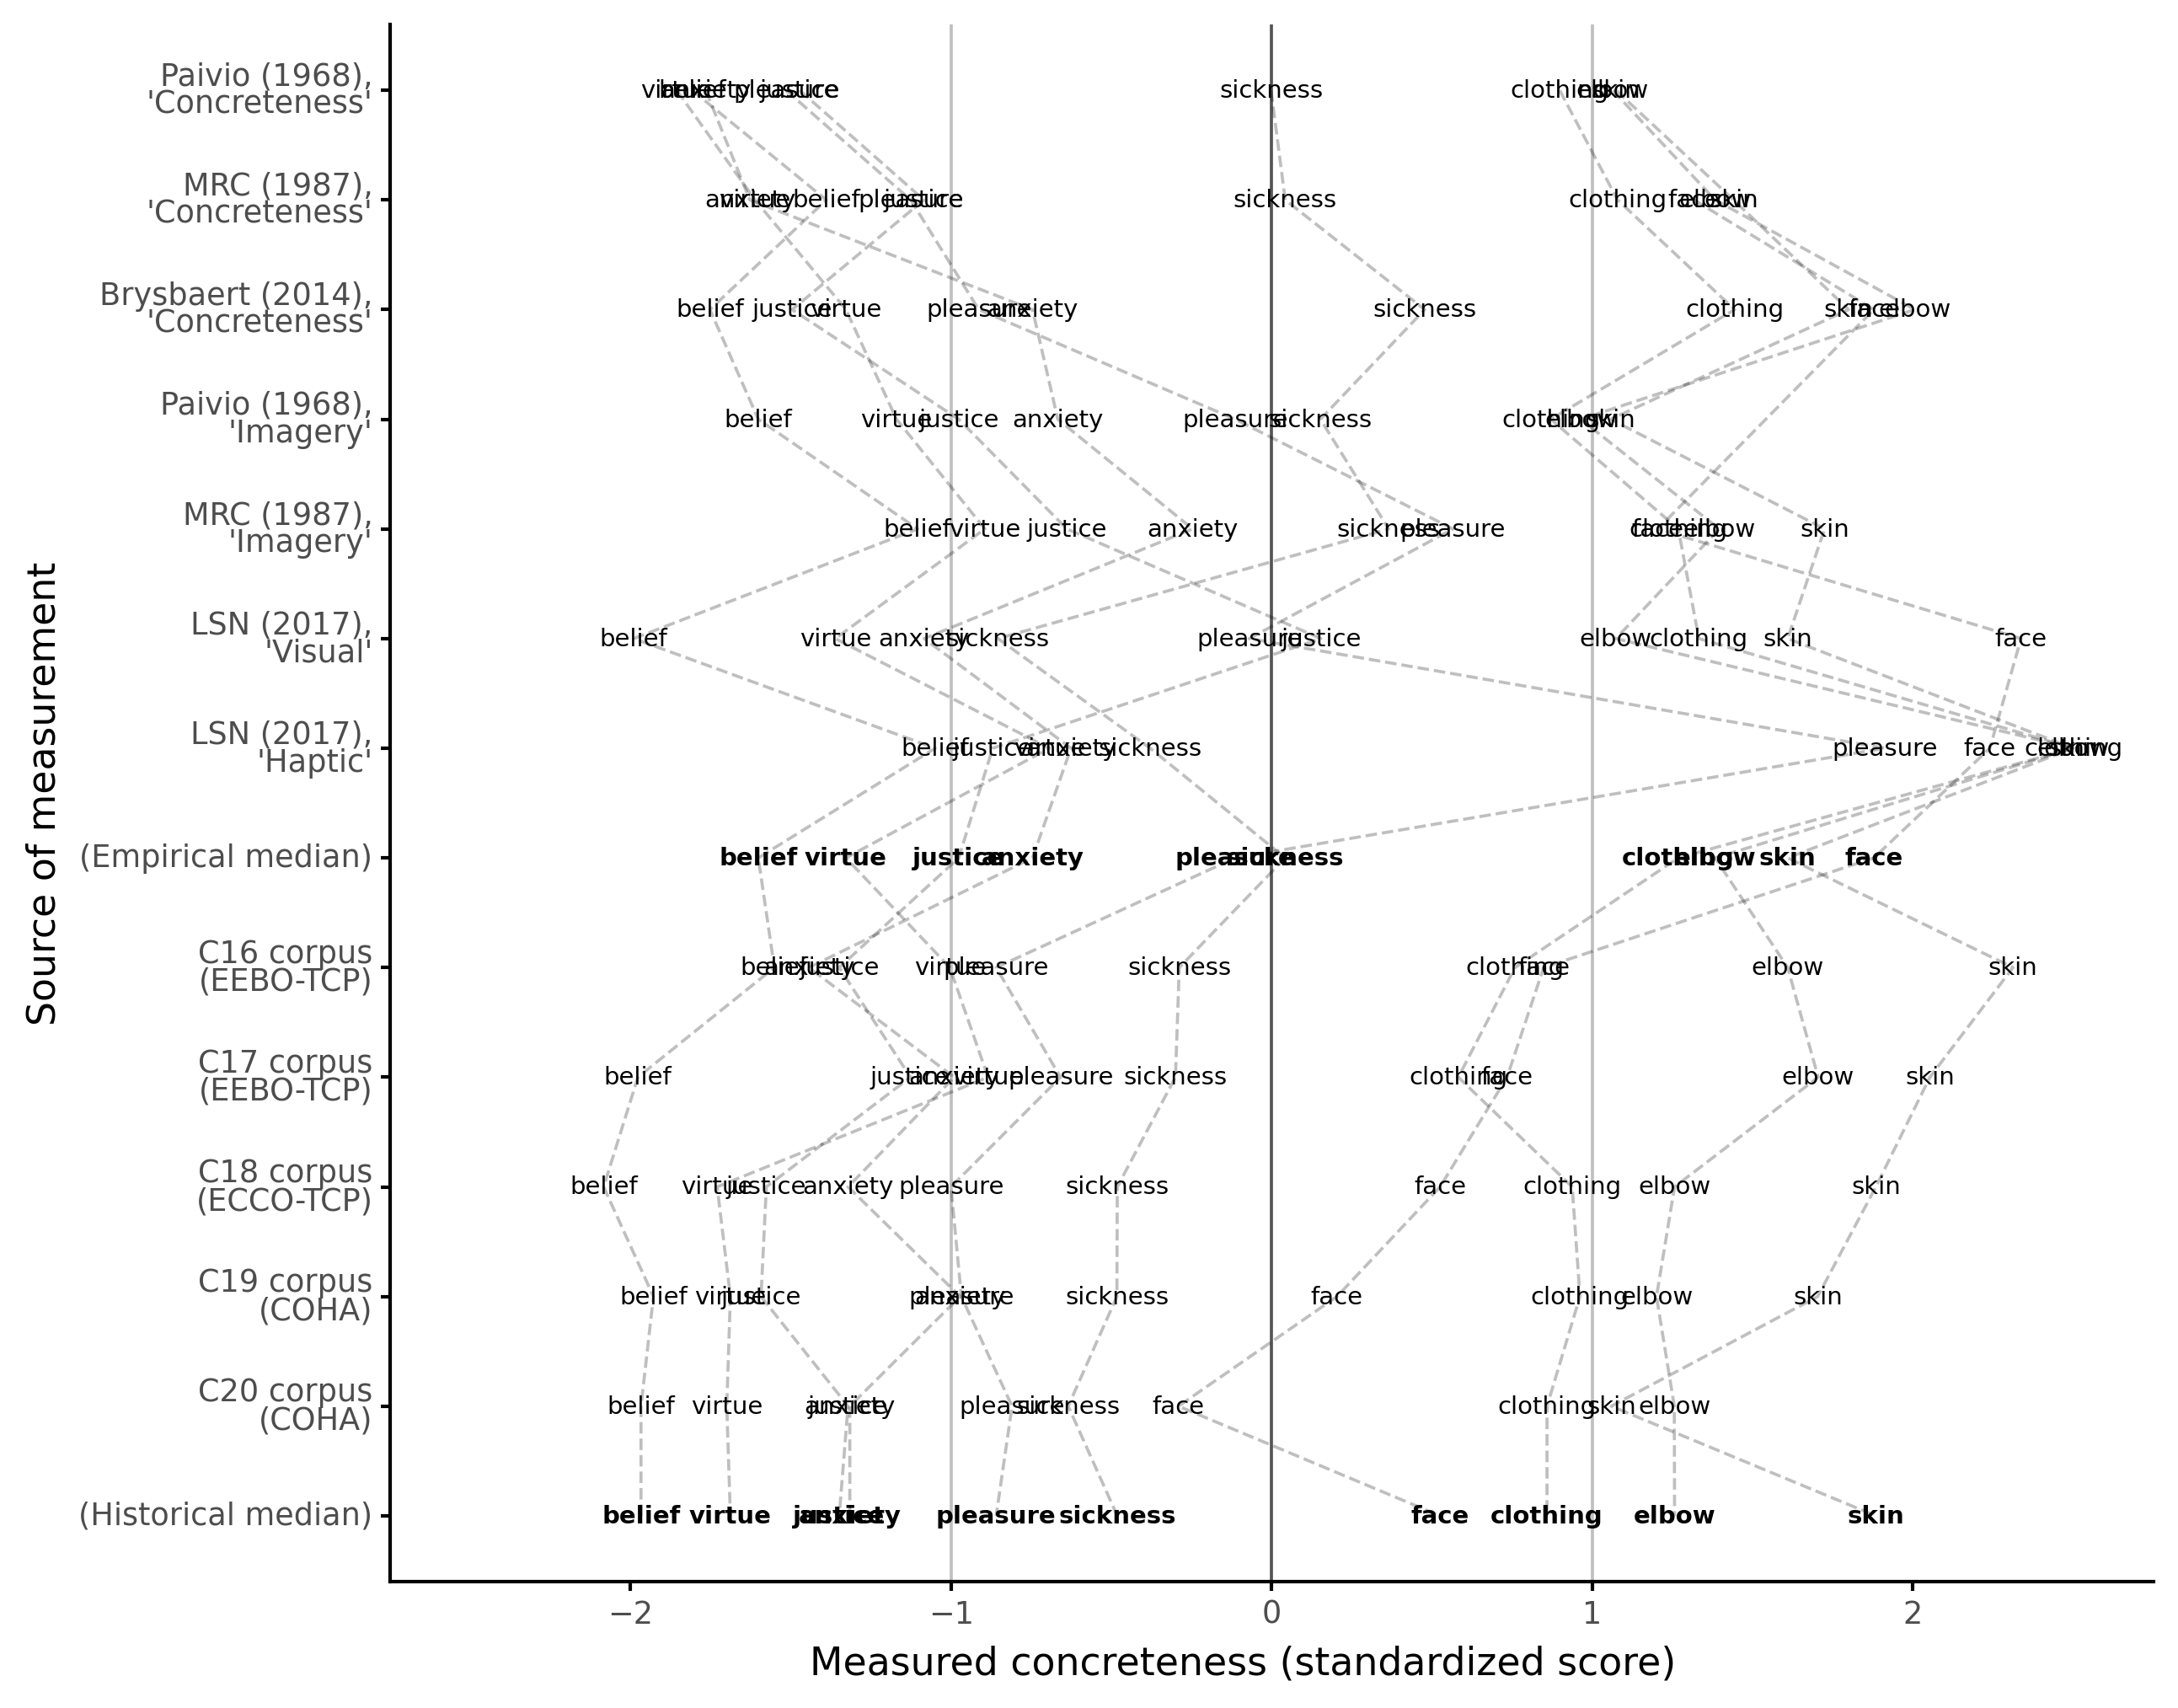

<ggplot: (8785005276565)>

In [ ]:
plot_allnorms(dfnorms,jitter=False)

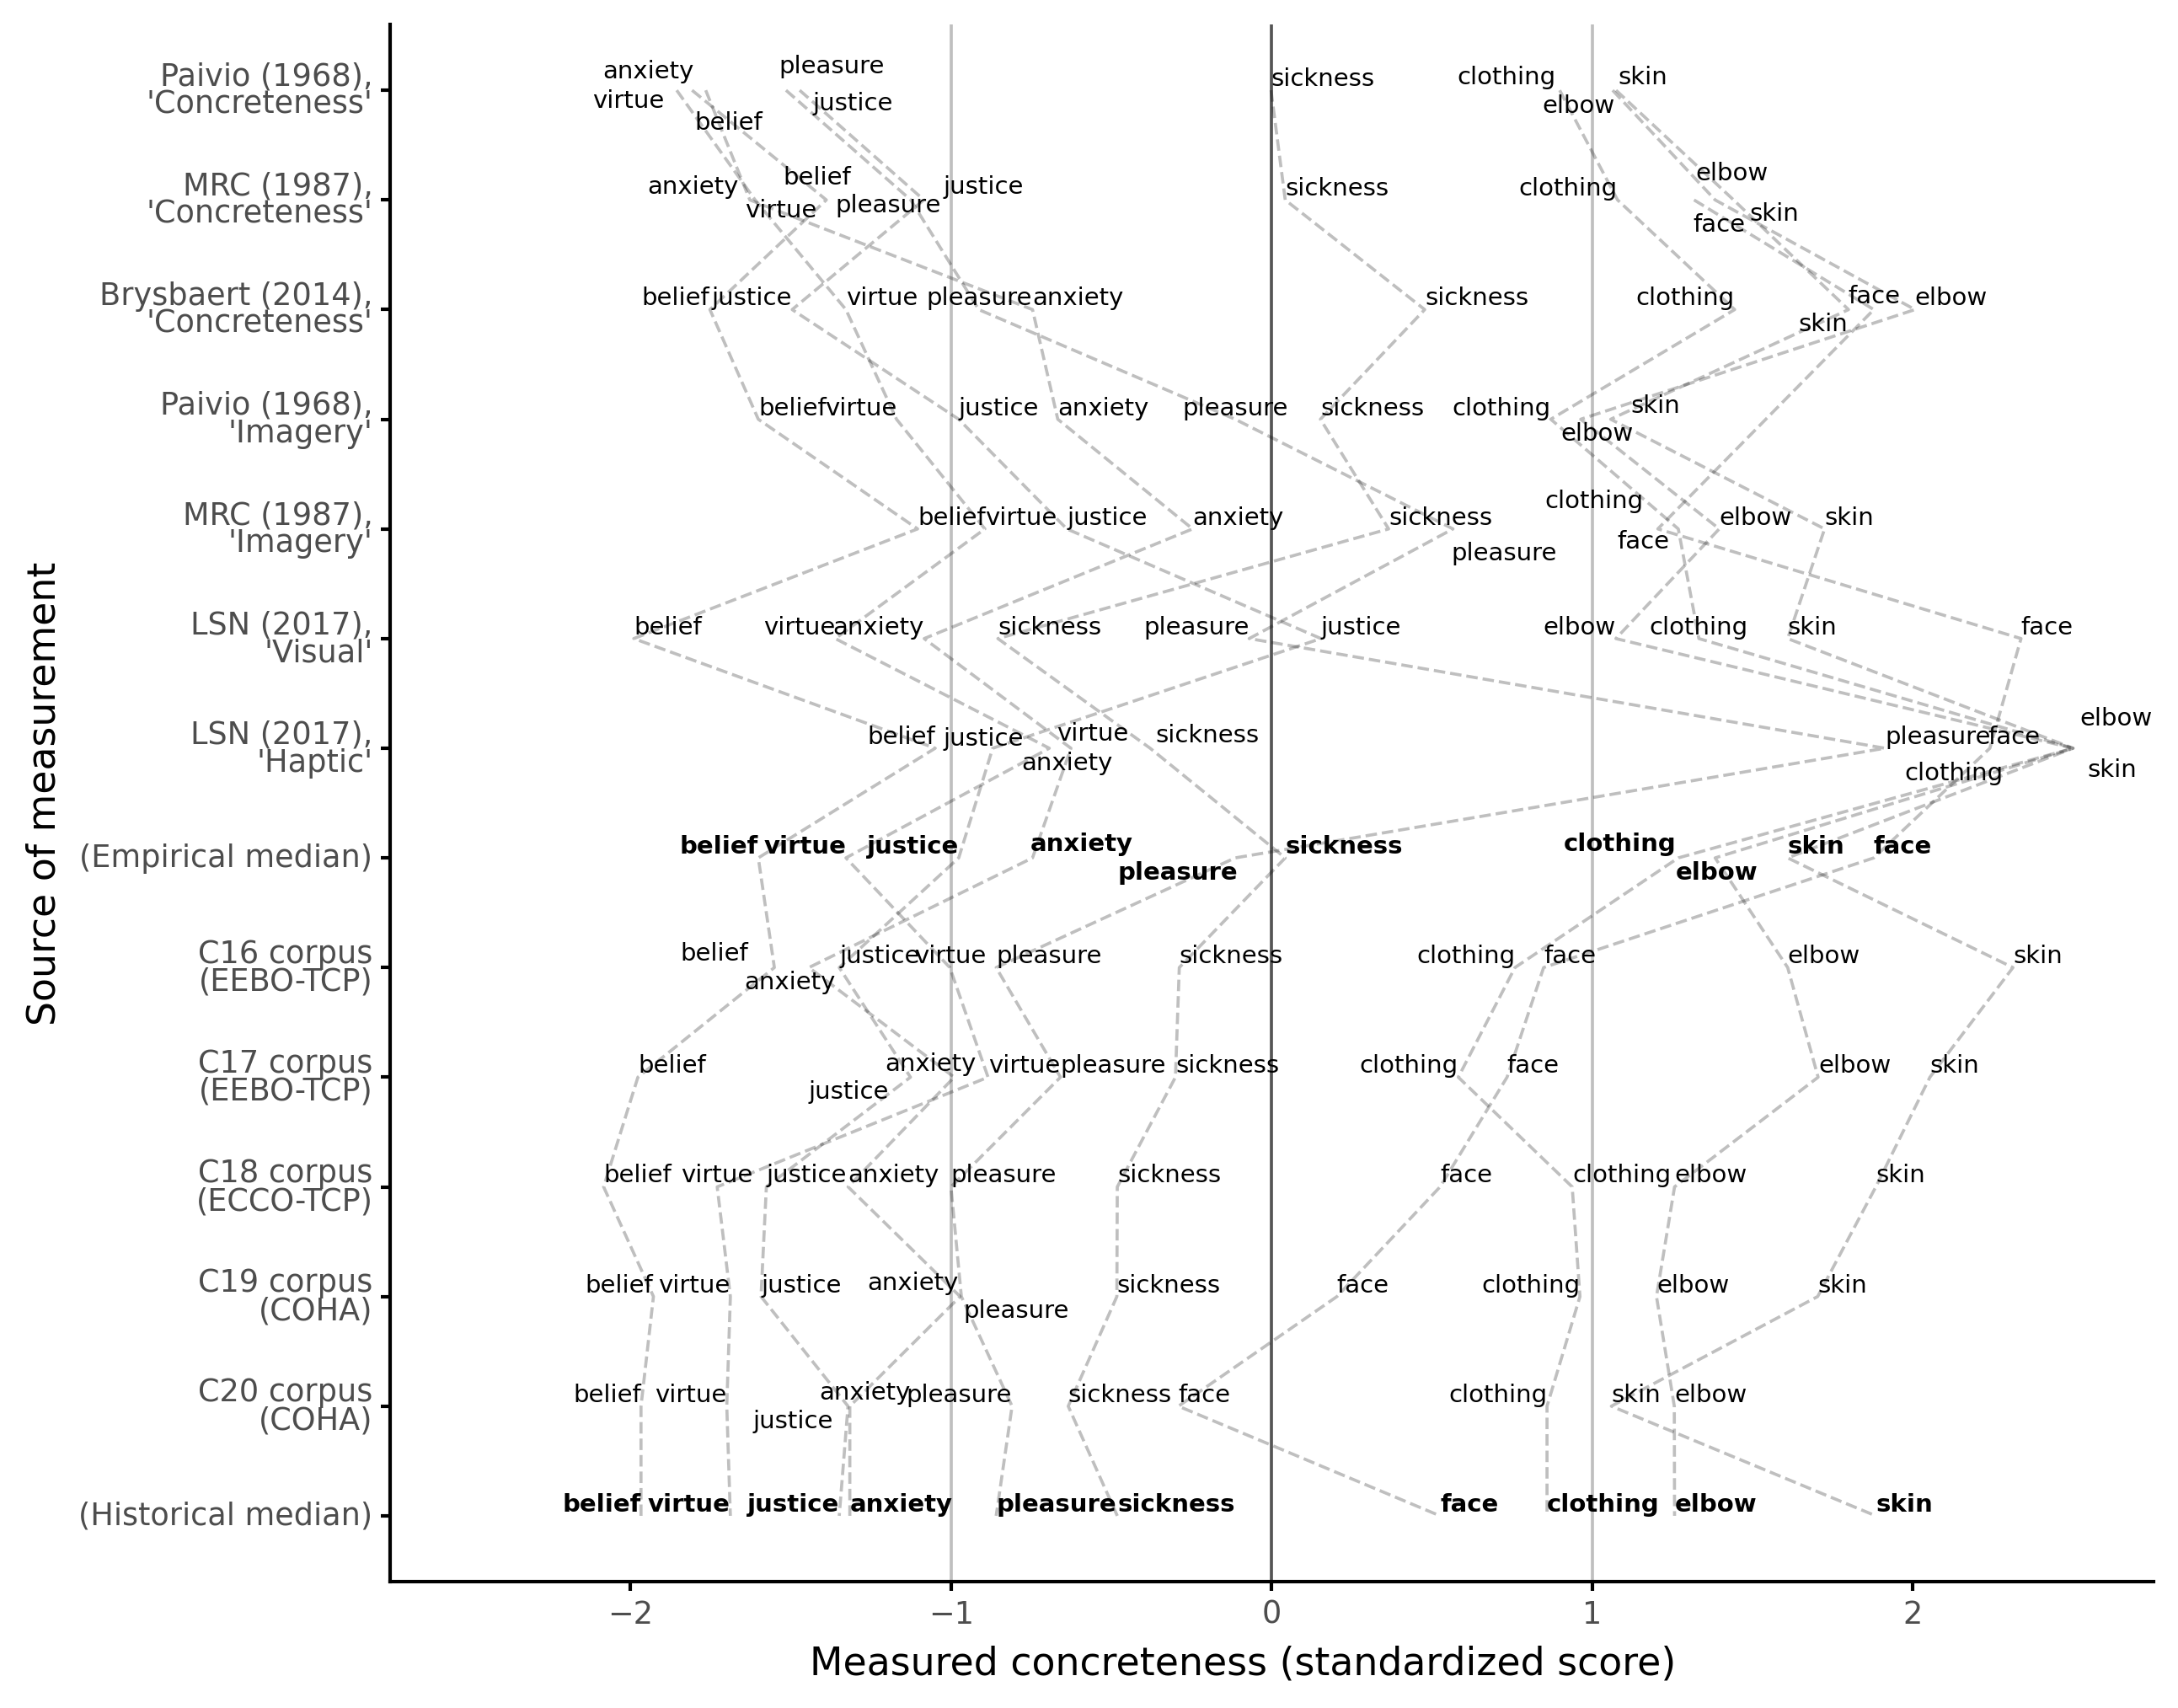

<ggplot: (8784996820765)>

In [ ]:
plot_allnorms(dfnorms,jitter=True)